In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [6]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [41]:
Y_train

array([9, 4, 8, ..., 1, 0, 4])

In [60]:
#Initialize nn params

def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1)- 0.5
    W2 = np.random.rand(10,10)- 0.5
    b2 = np.random.rand(10,1)- 0.5
    return W1, b1, W2, b2

def relu(Z):
    return np.maximum(Z,0)

def softmax(Z):
    exp = np.exp(Z-np.max(Z))
    return exp / exp.sum(axis=0)
    
#forward propagation

def one_hot (Y):
    one_hot_y = np.zeros((Y.size, Y.max() + 1))
    one_hot_y[np.arange(Y.size),Y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

def deriv_relu(Z):
    return Z > 0
        
    
def forward(W1,b1,W2,b2, X):
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

#back prop

def backward(Z1, A1, Z2, A2, W1,W2, X,Y):
    m = Y.size
    one_hot_y = one_hot(Y)
    dZ2 = A2 - one_hot_y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2,1)
    dZ1 = W2.T.dot(dZ2) * deriv_relu(Z1)
    dW1= 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1,1)
    return dW1, db1, dW2, db2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * np.reshape(db1, (10,1))
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * np.reshape(db2,(10,1))
    return W1,b1,W2,b2
    
    

In [56]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions == Y) / Y.size

#gradient descent
def grad_desc(X,Y,iterations,alpha):
    W1,b1,W2,b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward(W1, b1,W2, b2,X)
        dW1,db1,dW2,db2 = backward(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1,b1,W2,b2 = update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i %50 == 0:
            print("Iteration: ",i)
            print("Accuracy: " ,get_accuracy(get_predictions(A2),Y))
    return W1, b1, W2, b2

In [57]:
W1, b1, W2, b2 = grad_desc(X_train,Y_train,500,0.1)

Iteration:  0
[6 5 7 ... 2 7 7] [9 4 8 ... 1 0 4]
Accuracy:  0.11295121951219513
Iteration:  50
[1 8 3 ... 1 5 0] [9 4 8 ... 1 0 4]
Accuracy:  0.40917073170731705
Iteration:  100
[9 4 8 ... 1 5 4] [9 4 8 ... 1 0 4]
Accuracy:  0.5892195121951219
Iteration:  150
[4 4 8 ... 1 0 4] [9 4 8 ... 1 0 4]
Accuracy:  0.6869512195121952
Iteration:  200
[9 4 8 ... 1 0 4] [9 4 8 ... 1 0 4]
Accuracy:  0.7479512195121951
Iteration:  250
[9 4 8 ... 1 0 4] [9 4 8 ... 1 0 4]
Accuracy:  0.7808780487804878
Iteration:  300
[9 4 8 ... 1 0 4] [9 4 8 ... 1 0 4]
Accuracy:  0.802439024390244
Iteration:  350
[9 4 8 ... 1 0 9] [9 4 8 ... 1 0 4]
Accuracy:  0.8179756097560975
Iteration:  400
[9 4 8 ... 1 0 9] [9 4 8 ... 1 0 4]
Accuracy:  0.8295853658536585
Iteration:  450
[9 4 8 ... 1 0 9] [9 4 8 ... 1 0 4]
Accuracy:  0.8379756097560975


In [63]:
def make_predictions(X,W1,b1,W2,b2):
    _,_,_,A2 = forward(W1,b1,W2,b2,X)
    predictions = get_predictions(A2)
    return predictions
def test_pred(index,W1,b1,W2,b2):
    current_img = X_train[:, index,None]
    prediction = make_predictions(X_train[:,index,None],W1,b1,W2,b2)
    label = Y_train[index]
    print("Prediction: ",prediction)
    print("Label: ",label)
    
    current_img = current_img.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_img, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  4


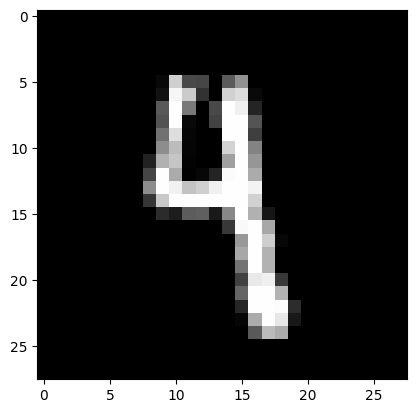

In [65]:
test_pred(22,W1,b1,W2,b2)